In [5]:
import time
start_time = time.time()
import pyodbc
from flashtext import KeywordProcessor
import nltk.data
import pandas as pd
from nltk import FreqDist

In [3]:
#Server document collection

In [35]:
server = '10.8.2.90' 
database = 'EarningsCalls' 
username = 'ecuser' 
password = 'ecuser@121'
con = 'Yes'
Selectcnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password+'; MARS_Connection=' + con)
Selectcursor = Selectcnxn.cursor()
Selectcursor.execute("select ecno, tfulltext,link,cdmsid,thtmltext from EC_Transcripts with(nolock) where ecno in (64918,152489,484580,495292,543059,151107,164216,184917,210448,499548,89827,93874,151343,151382,191102,505501,68176,163031,446532,641434,56785,61021,75802,152083,168175,171023,174010,79437,86134,151230,151261,161057,217084,491839,495610,56097,64624,71147,75437,174612,207320,97398,151698,153680,173379,194444,212454,513358,72656,85576,152673,193536,79178,100497,150650,257951,67495,444629,646802,90135,150761,150799,150812,150846,184247,220457,504720,82945,150946,150961,163894,625562,82677,93534,203745,96856,182855,261508,486819,494512,677240,179771,197501)")

sentences=[]
links=[]
htmls=[]
while True:
    rows = Selectcursor.fetchmany(1)
    if not rows:
        break

    for row1 in rows:
        EC_No = row1[0]
        print(EC_No)
        link=row1[2]
        html=row1[4]
        Atext = row1[1]
        
        #Tokenizing Sentences
        htmls.append(html)
        sentences.append(Atext)
        links.append(link)
        
#        #Splitting by /n
#        for sent in sentences:
#            result = sent.splitlines()
#            for res in result:
#                Sentenceslst.append(res)
        
        #matching through each sentences
        for sent in sentences:
            pass
            


56097
56785
61021
64624
64918
67495
68176
71147
72656
75437
75802
79178
79437
82677
82945
85576
86134
89827
90135
93534
93874
96856
97398
100497
150650
150761
150799
150812
150846
150946
150961
151107
151230
151261
151343
151382
151698
152083
152489
152673
153680
161057
163031
163894
164216
168175
171023
173379
174010
174612
179771
182855
184247
184917
191102
193536
194444
197501
203745
207320
210448
212454
217084
220457
257951
261508
444629
446532
484580
486819
491839
494512
495292
495610
499548
504720
505501
513358
543059
625562
641434
646802
677240


In [23]:
with open('Sentences.txt', 'w') as filehandle:
    for listitem in sentences:
        filehandle.write('%s\n' % listitem)

In [16]:
Selectcnxn.close()
print("--- %s seconds ---" % (time.time() - start_time))         

--- 311.7084860801697 seconds ---


In [42]:
sentences[0].split('\n')

['Pfizer Inc. (NYSE:PFE) Q4 2015 Earnings Conference Call February  2, 2016 10:00 AM ET',
 'Executives',
 'Chuck Triano - SVP, IR',
 'Ian Read - Chairman and CEO',
 "Frank D'Amelio - CFO",
 'Mikael Dolsten - President of Worldwide Research and Development',
 'Albert Bourla - President of Vaccines, Oncology and Consumer',
 'Geno Germano - President of Global Innovative Pharma',
 'John Young - President of Established Pharma',
 'Doug Lankler - General Counsel',
 'Analysts',
 'Colin Bristow - Bank of America',
 'Alex Arfaei - BMO Capital Markets',
 'Jami Rubin - Goldman Sachs',
 'Andrew Baum - Citi',
 'Vamil Divan - Credit Suisse',
 'Steve Scala - Cowen',
 'Mark Schoenebaum - Evercore ISI',
 'Marc Goodman - UBS',
 'John Boris - SunTrust',
 'Tim Anderson - Bernstein',
 'Richard Purkiss - Piper Jaffray',
 'Geoff Meacham - Barclays',
 'David Risinger - Morgan Stanley',
 'Gregg Gilbert - Deutsche Bank',
 'Chris Schott - JPMorgan',
 'Manoj Garg - HealthCo',
 'Operator',
 "Good day everyone, an

In [75]:
x=[]

In [76]:
for j in range(len(sentences)):
    x.append(''.join([i  for i in sentences[j].split('\n') if len(i)>85]))

In [89]:
df=pd.DataFrame(columns=['Documents'])

In [90]:
df['Documents']=x

In [133]:
df['Documents'].iloc[0]

"Good day everyone, and welcome to Pfizer's Fourth Quarter 2015 Earnings Conference Call. Today's call is being recorded. At this time, I would like to turn the call over to Mr. Chuck Triano, Senior Vice President of Investor Relations. Please go ahead, sir.Good morning, and thanks for joining us today to review Pfizer's fourth quarter and full year 2015 performance, as well as 2016 financial guidance.I am joined here today as usual by our Chairman and CEO, Ian Read; Frank D'Amelio, our CFO; Mikael Dolsten, President of Worldwide Research and Development; Albert Bourla, President of Vaccines, Oncology and Consumer; Geno Germano, President of Global Innovative Pharma; John Young, President of Established Pharma; and Doug Lankler, General Counsel.The slides that will be presented on this call can be viewed on our homepage, pfizer.com by clicking on the link for Pfizer Quarterly Corporate Performance Fourth Quarter 2015, which is located in the For Investors Section in the lower right han

In [136]:
import summarize

In [140]:
ss=summarize.SimpleSummarizer()

In [ ]:
ss.summarize('Hi I am sandeeep',2)

In [148]:
from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals

from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


LANGUAGE = "english"
SENTENCES_COUNT = 3


if __name__ == "__main__":
    url = "https://en.wikipedia.org/wiki/Automatic_summarization"
    #parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
    # or for plain text files
    # parser = PlaintextParser.from_file("document.txt", Tokenizer(LANGUAGE))
    parser = PlaintextParser.from_string(x[0], Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)

    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)

    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        print(sentence)

We believe Xeljanz can potentially fill a significant unmet need in the psoriatic arthritis when non-biologic DMARDS do not have proven success, and where there are currently few alternatives for patients who have inadequate responses to anti-TNF therapy.In addition, in the first half of the year we anticipate the decisions from the FDA for a once-a-day daily Xeljanz formulation for rheumatoid arthritis, and we remain on track to re-file our application for RA in the EU.For Ibrance, we expect to see the top line PALOMA-2 study results in first-line advanced breast cancer in combination with letrozole, and we have an April PDUFA date for second and third-line treatment for advanced breast cancer based on the PALOMA-3 data.
Of course, always we would caution you can speculate on things that haven't been studied in humans in comparative aspects, but you know, we think it's important to hit CDK 4/6 hard for breast cancer, and when you do that with high doses you will get efficacy on the tu

In [ ]:
for token in doc:
    print(nlp.vocab.morphology.tag_map[token.tag_])

In [102]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kasandeep\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [109]:
text=nltk.word_tokenize(x[0])
for i in nltk.pos_tag(text):
    if i[1]=='MD':
        print(i)

('would', 'MD')
('will', 'MD')
('can', 'MD')
("'d", 'MD')
('will', 'MD')
('could', 'MD')
('could', 'MD')
('will', 'MD')
('can', 'MD')
('will', 'MD')
('will', 'MD')
("'ll", 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
("'ll", 'MD')
('can', 'MD')
('could', 'MD')
('will', 'MD')
('will', 'MD')
('may', 'MD')
('can', 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
("'ll", 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
('can', 'MD')
("'ll", 'MD')
("'d", 'MD')
('would', 'MD')
('may', 'MD')
('can', 'MD')
('should', 'MD')
("'ll", 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
('will', 'MD')
('can', 'MD')
('may', 'MD')
('can', 'MD')
('may', 'MD')
("'d", 'MD')
('would', 'MD')
('would', 'MD')
('may', 'MD')
('can', 'MD')
('Can', 'MD')
('should', 'MD')
('should', 'MD')
('should', 'MD')
("'ll", 'MD')
("'ll", 'MD')
('can', 'MD')
('will', 'MD')
('can', 'MD')
('can', 'MD')
('could', 'MD')
('would', 

In [113]:
import spacy
from gensim.summarization.summarizer import summarize 
from gensim.summarization import keywords 
nlp =spacy.load('en_core_web_sm')
doc = nlp(x[0]) 

In [120]:
summ_words = summarize(x[0], word_count = 200) 
print("Word count summary") 
print(summ_words) 

Word count summary
Please go ahead, sir.Good morning, and thanks for joining us today to review Pfizer's fourth quarter and full year 2015 performance, as well as 2016 financial guidance.I am joined here today as usual by our Chairman and CEO, Ian Read; Frank D'Amelio, our CFO; Mikael Dolsten, President of Worldwide Research and Development; Albert Bourla, President of Vaccines, Oncology and Consumer; Geno Germano, President of Global Innovative Pharma; John Young, President of Established Pharma; and Doug Lankler, General Counsel.The slides that will be presented on this call can be viewed on our homepage, pfizer.com by clicking on the link for Pfizer Quarterly Corporate Performance Fourth Quarter 2015, which is located in the For Investors Section in the lower right hand corner of the page.Before we start, I'd like to remind you that our discussion during the call will include forward-looking statements and that actual results could differ materially from those projected in the state

In [70]:
df=pd.read_csv('Future_text.csv')

In [71]:
x=df['Documents']

In [16]:
from summarizer import Summarizer

In [17]:
model = Summarizer()

In [18]:
result = model(x[0], min_length=60)
full = ''.join(result)
print(full)

Good day everyone, and welcome to Pfizer's Fourth Quarter 2015 Earnings Conference Call. At this time, I would like to turn the call over to Mr. Chuck Triano, Senior Vice President of Investor Relations. We will now make prepared remarks and then we will move to a question-and-answer session. We finished 2015 with strong financial and operational performance. And we believe that Prevnar adult global revenues will be comparable to the strong results we achieved in 2015. They are competitively positioned to win their markets and are performing strongly against their competitors' set. We believe Xeljanz can potentially fill a significant unmet need in the psoriatic arthritis when non-biologic DMARDS do not have proven success, and where there are currently few alternatives for patients who have inadequate responses to anti-TNF therapy. In addition, in the first half of the year we anticipate the decisions from the FDA for a once-a-day daily Xeljanz formulation for rheumatoid arthritis, an

#Text Blob POS Tags

In [104]:
from textblob import TextBlob
blob = TextBlob(x[0])
for word, pos in blob.tags:
            print(word, pos)

Good JJ
day NN
everyone NN
and CC
welcome VB
to TO
Pfizer NNP
's POS
Fourth NNP
Quarter NNP
2015 CD
Earnings NNP
Conference NNP
Call NNP
Today NN
's POS
call NN
is VBZ
being VBG
recorded VBN
At IN
this DT
time NN
I PRP
would MD
like VB
to TO
turn VB
the DT
call NN
over IN
to TO
Mr. NNP
Chuck NNP
Triano NNP
Senior NNP
Vice NNP
President NNP
of IN
Investor NNP
Relations NNP
Please NNP
go VB
ahead RB
sir.Good VBD
morning NN
and CC
thanks NNS
for IN
joining VBG
us PRP
today NN
to TO
review VB
Pfizer NNP
's POS
fourth JJ
quarter NN
and CC
full JJ
year NN
2015 CD
performance NN
as RB
well RB
as IN
2016 CD
financial JJ
guidance.I NN
am VBP
joined VBN
here RB
today NN
as IN
usual JJ
by IN
our PRP$
Chairman NNP
and CC
CEO NNP
Ian NNP
Read NNP
Frank NNP
D'Amelio NNP
our PRP$
CFO NNP
Mikael NNP
Dolsten NNP
President NNP
of IN
Worldwide NNP
Research NNP
and CC
Development NNP
Albert NNP
Bourla NNP
President NNP
of IN
Vaccines NNP
Oncology NNP
and CC
Consumer NNP
Geno NNP
Germano NNP
President NNP


can MD
create VB
value NN
for IN
our PRP$
shareholders NNS
and CC
bring VB
innovative JJ
medicines NNS
to TO
patients NNS
by IN
producing VBG
expected VBN
top JJ
line NN
growth NN
progressing VBG
key JJ
pipeline NN
assets NNS
pursuing VBG
strategic JJ
business NN
development NN
and CC
returning VBG
capital NN
to TO
shareholders NNS
through IN
dividends NNS
and CC
buybacks.Now NN
I PRP
'll MD
turn VB
it PRP
over IN
to TO
Frank NNP
for IN
additional JJ
details NNS
on IN
the DT
quarter NN
and CC
our PRP$
2016 CD
financial JJ
guidance.Thanks NNS
Ian NNP
Good JJ
day NN
everyone NN
As IN
always RB
the DT
charts NNS
that IN
we PRP
're VBP
viewing VBG
today NN
are VBP
included VBN
in IN
our PRP$
webcast NN
As IN
a DT
reminder NN
because IN
we PRP
completed VBD
the DT
acquisition NN
of IN
Hospira NNP
on IN
September NNP
3 CD
2015 CD
Pfizer NNP
's POS
full JJ
year NN
financial JJ
results NNS
for IN
the DT
year NN
ended VBD
December NNP
31 CD
2015 CD
include VBP
four CD
months NNS
of IN
legacy NN

allocation NN
In IN
2015 CD
we PRP
returned VBD
13.1 CD
billion CD
to TO
our PRP$
shareholders NNS
through IN
dividends NNS
and CC
share NN
repurchases NNS
And CC
we PRP
expect VBP
to TO
execute VB
a DT
5 CD
billion CD
accelerated VBN
share NN
repurchase JJ
program NN
in IN
the DT
first JJ
half NN
of IN
2016 CD
Finally RB
we PRP
remain VBP
committed JJ
to TO
delivering VBG
attractive JJ
shareholder NN
returns NNS
in IN
2016 CD
and CC
beyond IN
[ NN
Operator NNP
Instructions NNP
] NNP
Your NNP
first JJ
question NN
comes VBZ
from IN
Colin NNP
Bristow NNP
from IN
Bank NNP
of IN
America.Good NNP
morning NN
and CC
congrats NNS
on IN
the DT
solid JJ
finish NN
for IN
the DT
year NN
So RB
a DT
couple NN
of IN
product-specific JJ
questions NNS
if IN
I PRP
may MD
on IN
the DT
Prevnar NNP
franchise NN
you PRP
've VBP
posted VBN
strong JJ
4Q CD
numbers NNS
Could NNP
you PRP
just RB
talk VB
about IN
your PRP$
expectations NNS
for IN
the DT
trajectory NN
going VBG
forward RB
On IN
Ibrance NNP
there 

numbers NNS
mostly RB
currency NN
and CC
patent NN
expirations NNS
Can MD
you PRP
remind VB
us PRP
when WRB
you PRP
expect VBP
and CC
this DT
excludes VBZ
the DT
acquisition NN
from IN
Allergan NNP
but CC
when WRB
you PRP
expect VBP
your PRP$
reported JJ
revenue NN
growth NN
or CC
just RB
talk VB
about IN
operationally RB
revenue NN
growth NN
when WRB
we PRP
should MD
start VB
to TO
see VB
a DT
positive JJ
inflection NN
point NN
because IN
it PRP
has VBZ
when WRB
I PRP
look VBP
at IN
my PRP$
models NNS
revenues NNS
have VBP
been VBN
in IN
decline NN
for IN
many JJ
years NNS
and CC
some DT
of IN
that DT
's VBZ
divestitures NNS
and CC
spins NNS
but CC
really RB
since IN
2013 CD
we PRP
've VBP
had VBD
revenues NNS
sort NN
of IN
flat JJ
to TO
down RB
When WRB
is VBZ
that IN
going VBG
to TO
change VB
and CC
what WP
's VBZ
going VBG
to TO
drive VB
that IN
change NN
just RB
talking VBG
from IN
Pfizer NNP
's POS
standpoint NN
Thanks NNS
very RB
much.Let VB
me PRP
just RB
do VBP
the DT
revenue 

talk VB
about IN
Sutent NNP
and CC
its PRP$
possible JJ
combinations NNS
and CC
the DT
other JJ
studies NNS
we PRP
have VBP
already RB
had VBN
on IN
Sutent NNP
And CC
then RB
I PRP
'll MD
ask VB
Frank NNP
to TO
come VB
back RB
on IN
your PRP$
questions NNS
about IN
growth NN
rates.We NN
remain VBP
very RB
confident JJ
in IN
our PRP$
position NN
in IN
the DT
RCC NNP
space NN
and CC
that DT
includes VBZ
both CC
Sutent NNP
and CC
Inlyta NNP
because IN
they PRP
are VBP
very RB
well RB
known VBN
by IN
physicians NNS
and CC
other JJ
stakeholders NNS
The DT
recent JJ
approval NN
in IN
RCC NNP
for IN
immunotherapy NN
but CC
this DT
does VBZ
not RB
affect VB
Sutent NNP
It PRP
is VBZ
in IN
the DT
second JJ
line NN
Sutent NN
is VBZ
used VBN
primarily RB
in IN
first JJ
line NN
And CC
s NN
we PRP
have VBP
previously RB
disclosed VBN
we PRP
are VBP
studying VBG
Inlyta NNP
and CC
Inlyta NNP
plus CC
other JJ
PD-1 JJ
inhibitors NNS
pretty RB
aggressively RB
so IN
that IN
we PRP
can MD
achieve VB
better

're VBP
just RB
tidying VBG
up RP
the DT
kind NN
of IN
last JJ
few JJ
details NNS
and CC
expect VBP
to TO
put VB
that DT
filing NN
in IN
imminently.So JJ
psoriasis NN
well RB
as IN
you PRP
probably RB
know VBP
we PRP
have VBP
a DT
we PRP
received VBD
a DT
complete JJ
response NN
letter NN
from IN
the DT
FDA NNP
on IN
psoriasis NN
We PRP
have VBP
provided VBN
a DT
backgrounder NN
to TO
the DT
FDA NNP
and CC
we PRP
expect VBP
to TO
meet VB
with IN
them PRP
also RB
this DT
quarter NN
to TO
follow-up NN
on IN
the DT
components NNS
of IN
the DT
complete JJ
response NN
letter NN
and CC
once RB
we PRP
know VBP
in IN
more JJR
detail NN
what WP
their PRP$
issues NNS
and CC
concerns NNS
are VBP
then RB
we PRP
'll MD
determine VB
best JJS
way NN
forward RB
from IN
there.Yes NN
So IN
we PRP
have VBP
certainly RB
announced VBN
the DT
deal NN
more JJR
than IN
2 CD
billion CD
We PRP
gave VBD
you PRP
the DT
timing NN
in IN
terms NNS
of IN
when WRB
we PRP
would MD
get VB
that DT
A DT
couple NN
of IN
co

Pfizer NNP
Wyeth NNP
documents NNS
or CC
any DT
difference NN
and CC
any DT
caveats NNS
you PRP
'd MD
like VB
to TO
order NN
to TO
let VB
us PRP
know VB
about IN
before RB
folks NNS
start VBP
slapping VBG
accretion NN
percentages NNS
on IN
those DT
numbers NNS
Secondly RB
going VBG
back RB
to TO
something NN
you PRP
said VBD
earlier RBR
Taking VBG
your PRP$
leverage NN
to TO
two-and-a-half NN
to TO
three CD
times NNS
for IN
Newco NNP
and CC
if IN
you PRP
were VBD
to TO
apply VB
that DT
capital NN
to TO
buybacks NNS
that WDT
would MD
create VB
EPS NNP
accretion NN
that WDT
's VBZ
far RB
beyond IN
what WP
you PRP
've VBP
suggested VBN
So RB
just RB
would MD
like VB
your PRP$
thoughts NNS
on IN
what WP
you PRP
'd MD
be VB
doing VBG
with IN
that DT
leverage NN
or CC
is VBZ
that DT
just RB
kind NN
of IN
a DT
hypothetical.And JJ
third JJ
for IN
John NNP
do VBP
you PRP
still RB
see VB
the DT
benefit NN
of IN
the DT
Hospira NNP
device NN
business NN
alongside IN
the DT
drug NN
business NN
as I

In [25]:
df1=pd.read_excel('FutureSentences_output600.xlsx',sheet_name=2)

In [30]:
set(df1['ECNo'])

{55429,
 55541,
 55628,
 55645,
 55709,
 55830,
 55913,
 55986,
 56097,
 56100,
 56220,
 56336,
 56785,
 57321,
 59298,
 59364,
 59423,
 59607,
 59638,
 59642,
 59810,
 59824,
 59941,
 59953,
 60337,
 60746,
 61021,
 63043,
 63081,
 63132,
 63316,
 63347,
 63457,
 63542,
 63552,
 63704,
 63728,
 64015,
 64108,
 64624,
 64918,
 65053,
 66908,
 66936,
 67050,
 67258,
 67268,
 67288,
 67376,
 67384,
 67495,
 67676,
 67828,
 68176,
 68814,
 68903,
 70670,
 70816,
 70859,
 70861,
 71038,
 71052,
 71064,
 71145,
 71147,
 71158,
 71234,
 71320,
 71407,
 72284,
 72656,
 74254,
 74305,
 74364,
 74581,
 74598,
 74706,
 74777,
 74923,
 74997,
 75037,
 75107,
 75437,
 75509,
 75802,
 76651,
 77932,
 78039,
 78069,
 78243,
 78249,
 78413,
 78444,
 78675,
 78749,
 78834,
 78845,
 79178,
 79237,
 79437,
 79516,
 81564,
 81616,
 81659,
 81822,
 81969,
 82001,
 82005,
 82168,
 82237,
 82410,
 82677,
 82945,
 83126,
 83200,
 83240,
 85189,
 85318,
 85385,
 85421,
 85440,
 85464,
 85576,
 85647,
 85653,


In [39]:
v=[]
for i in df1[df1['ECNo']==55429]['Sentence']:
    v.append(i)

In [41]:
''.join(v)

"But with reference to my earlier comments on redeploying balance sheet, a portion of this reduction will likely reverse in the near future.Do you intend to keep lending to the oil and gas companies as they run into problems?These deposits that we're talking about that have the high basis are valuable deposits with valuable clients for us and we want to be competitive and pay fair rates.A lot of concerns we're going to get into some type of broader deterioration of which your numbers showed no signs of heading towards --what are you looking for?Operator\nYour next question -- \nMarianne Lake\nSo based on that with the obvious caveat of what happens with oil prices and energy over the course of the near future, yes, we would still expect our charge-offs to be relatively low.You've said that you don't want to be an outlier, so you're whittling that down.At that point it becomes increasingly compelling to want to look at the margin for what you could do to get within the bucket and so tha

In [42]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [89]:
f=nlp(''.join(v))

In [58]:
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


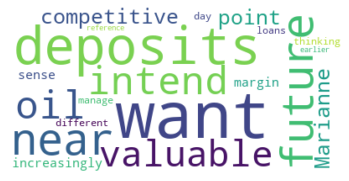

In [90]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=20).generate(str(f))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
from gensim.summarization.summarizer import summarize

In [74]:
d=nlp(x[0])

In [76]:
d

Good day everyone, and welcome to Pfizer's Fourth Quarter 2015 Earnings Conference Call. Today's call is being recorded. At this time, I would like to turn the call over to Mr. Chuck Triano, Senior Vice President of Investor Relations. Please go ahead, sir.Good morning, and thanks for joining us today to review Pfizer's fourth quarter and full year 2015 performance, as well as 2016 financial guidance.I am joined here today as usual by our Chairman and CEO, Ian Read; Frank D'Amelio, our CFO; Mikael Dolsten, President of Worldwide Research and Development; Albert Bourla, President of Vaccines, Oncology and Consumer; Geno Germano, President of Global Innovative Pharma; John Young, President of Established Pharma; and Doug Lankler, General Counsel.The slides that will be presented on this call can be viewed on our homepage, pfizer.com by clicking on the link for Pfizer Quarterly Corporate Performance Fourth Quarter 2015, which is located in the For Investors Section in the lower right hand

In [95]:
print(summarize(str(d),word_count=1000))

Please go ahead, sir.Good morning, and thanks for joining us today to review Pfizer's fourth quarter and full year 2015 performance, as well as 2016 financial guidance.I am joined here today as usual by our Chairman and CEO, Ian Read; Frank D'Amelio, our CFO; Mikael Dolsten, President of Worldwide Research and Development; Albert Bourla, President of Vaccines, Oncology and Consumer; Geno Germano, President of Global Innovative Pharma; John Young, President of Established Pharma; and Doug Lankler, General Counsel.The slides that will be presented on this call can be viewed on our homepage, pfizer.com by clicking on the link for Pfizer Quarterly Corporate Performance Fourth Quarter 2015, which is located in the For Investors Section in the lower right hand corner of the page.Before we start, I'd like to remind you that our discussion during the call will include forward-looking statements and that actual results could differ materially from those projected in the statements.
We ended 201

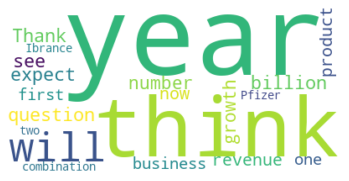

In [86]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=20).generate(x[0])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

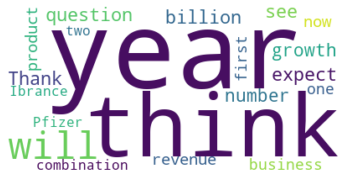

In [85]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=20).generate(str(d))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

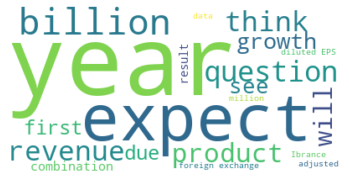

In [84]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=20).generate(summarize(str(d)))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()